# Autoencoder
Example: Encode random numbers between 0 and 21 (inclusive) in THREE dimensions

In [1]:
import numpy as np
import keras
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
# generate 10k fake instances, each a number between 0 and 22 (e.g. category)
cat = np.random.randint(low=0, high=22, size=(10_000, 1))
cat

array([[ 2],
       [16],
       [13],
       ...,
       [ 8],
       [18],
       [12]])

One-hot encode to be represented as a (22 dimensional) vector

In [4]:
ohe = OneHotEncoder()
cat_ohe = ohe.fit_transform(cat)
cat_ohe

<10000x22 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [10]:
encoding_dimension = 3

inp = keras.Input(shape=(22,))
enc = keras.layers.Dense(encoding_dimension, activation='relu')(inp)  # Bottleneck/Encoder
x = keras.layers.Dense(22, activation='softmax')(enc)

model = keras.Model(inp, x)
model.compile('adam', 'categorical_crossentropy')

encoder = keras.Model(inp, enc)
_dec_in = keras.Input((encoding_dimension,))
decoder = keras.Model(_dec_in, model.layers[-1](_dec_in))

In [13]:
model.fit(cat_ohe, cat_ohe, epochs=20, batch_size=16, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 119us/step - loss: 1.5961 - val_loss: 1.5602
Epoch 2/20
8000/8000 [==============================] - 1s 127us/step - loss: 1.5069 - val_loss: 1.4814
Epoch 3/20
8000/8000 [==============================] - 1s 128us/step - loss: 1.4345 - val_loss: 1.4138
Epoch 4/20
8000/8000 [==============================] - 1s 123us/step - loss: 1.3692 - val_loss: 1.3493
Epoch 5/20
8000/8000 [==============================] - 1s 119us/step - loss: 1.3055 - val_loss: 1.2859
Epoch 6/20
8000/8000 [==============================] - 1s 123us/step - loss: 1.2419 - val_loss: 1.2210
Epoch 7/20
8000/8000 [==============================] - 1s 109us/step - loss: 1.1754 - val_loss: 1.1525
Epoch 8/20
8000/8000 [==============================] - 1s 113us/step - loss: 1.1076 - val_loss: 1.0848
Epoch 9/20
8000/8000 [==============================] - 1s 115us/step - loss: 1.0430 - val_loss: 1.0210
Epoch 10/20
8000

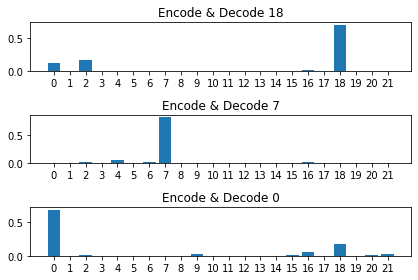

In [29]:
fig, axes = plt.subplots(3, sharex=False)
axes[0].bar(height=model.predict(ohe.transform([[18]])).tolist()[0], x=range(22))
axes[0].set_xticks(range(22));
axes[0].set_title("Encode & Decode 18")

axes[1].bar(height=model.predict(ohe.transform([[7]])).tolist()[0], x=range(22))
axes[1].set_xticks(range(22));
axes[1].set_title("Encode & Decode 7")

axes[2].bar(height=model.predict(ohe.transform([[0]])).tolist()[0], x=range(22))
axes[2].set_xticks(range(22));
axes[2].set_title("Encode & Decode 0")
plt.tight_layout()

Encoding for $18$

In [30]:
encoder.predict(ohe.transform([[18]]))

array([[1.5437603e-04, 4.5114141e+00, 4.4753590e+00]], dtype=float32)